**RESET**

In [ ]:
import shutil

# # Chemin du dossier à supprimer
# dossier_a_supprimer = '/content/data'
# # Supprimer le dossier et son contenu
# shutil.rmtree(dossier_a_supprimer)

# dossier_a_supprimer = '/content/test_data'
# shutil.rmtree(dossier_a_supprimer)


# dossier_a_supprimer = '/content/yolov5'
# shutil.rmtree(dossier_a_supprimer)


# fichier_a_supprimer = '/content/custom.yaml'
# os.remove(fichier_a_supprimer)

In [2]:
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

# Spécifier le chemin vers votre fichier .pt dans Google Drive
MODEL_PATH = '/content/drive/MyDrive/best.pt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Setup Yolov5**

In [5]:
%%bash
git clone https://github.com/ultralytics/yolov5
cd yolov5
pip install -r requirements.txt
pip install -qr requirements.txt comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.1/715.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.1/610.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 45.2 MB/s eta 0:00:00


Cloning into 'yolov5'...


In [6]:
# import torch
# import utils

# display = utils.notebook_init()  # checks

ModuleNotFoundError: No module named 'utils'

**Create yaml file**

In [7]:
import yaml

# Chemin du fichier YAML à créer/remplir
YAML_FILE = '/content/custom.yaml'

# Contenu du fichier YAML
contenu_yaml = {
    'path': '/content/data',
    'train': ['images'],
    'val': ['images'],
    'names': {
        0: 'cedez_le_passage',
        1: 'stop',
        2: 'speed',
        3: 'sens_interdit'
    }
}

# Écriture du contenu dans le fichier YAML
with open(YAML_FILE, 'w') as fichier:
    yaml.dump(contenu_yaml, fichier)

print(f'Le fichier "{YAML_FILE}" a été créé et rempli avec succès.')

Le fichier "/content/custom.yaml" a été créé et rempli avec succès.


**Trainning**

In [16]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os


IMG_SIZE = 448
BATCH_SIZE = 8
N_EPOCHS = 20
WEIGHTS = "yolov5s.pt" # essayer avec autre que "yolov5s" ? Un autre plus complexe ? "yolov5m" ou "yolov5l" ou "yolov5x"
N_WORKERS = 2

!python yolov5/train.py --img 448 --batch 8 --epochs 5 --data "/content/custom.yaml" --weights yolov5s.pt --workers 2 --cache


2024-02-18 14:46:53.178810: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 14:46:53.180340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 14:46:53.184719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5l.pt, cfg=, data=/content/custom.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=8, imgsz=448, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, s

**Predictions avec 'detect.py'**

detect: weights=['/content/drive/MyDrive/best.pt'], source=/content/test_data/sens_interdit.png, data=yolov5/data/coco128.yaml, imgsz=[448, 448], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_data/sens_interdit.png: 448x448 1 stop, 1 sens_interdit, 226.9ms
Speed: 3.5ms pre-process, 226.9ms inference, 1.2ms NMS per image at shape (1, 3, 448, 448)
Results saved to yolov5/runs/detect/exp16
/content/yolov5/runs/detect/exp16/sens_interdit.png


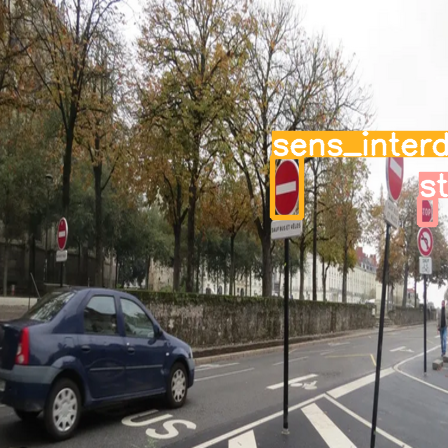

detect: weights=['/content/drive/MyDrive/best.pt'], source=/content/test_data/cedez.png, data=yolov5/data/coco128.yaml, imgsz=[448, 448], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_data/cedez.png: 448x448 1 ceder_le_passage, 191.2ms
Speed: 2.3ms pre-process, 191.2ms inference, 1.2ms NMS per image at shape (1, 3, 448, 448)
Results saved to yolov5/runs/detect/exp17
/content/yolov5/runs/detect/exp17/cedez.png


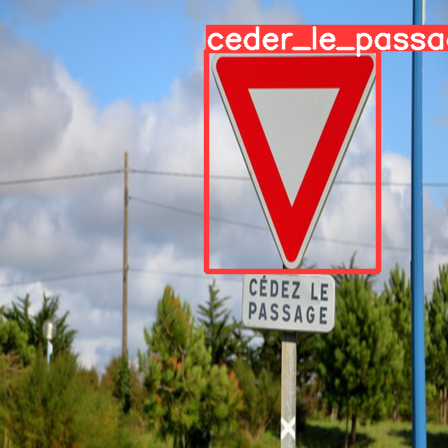

detect: weights=['/content/drive/MyDrive/best.pt'], source=/content/test_data/stop.png, data=yolov5/data/coco128.yaml, imgsz=[448, 448], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_data/stop.png: 448x448 1 stop, 1 sens_interdit, 194.1ms
Speed: 1.7ms pre-process, 194.1ms inference, 1.1ms NMS per image at shape (1, 3, 448, 448)
Results saved to yolov5/runs/detect/exp18
/content/yolov5/runs/detect/exp18/stop.png


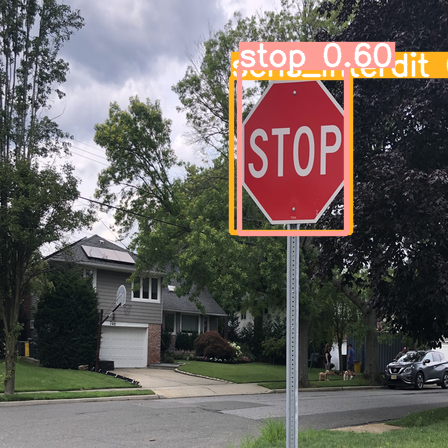

detect: weights=['/content/drive/MyDrive/best.pt'], source=/content/test_data/2_speed.png, data=yolov5/data/coco128.yaml, imgsz=[448, 448], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_data/2_speed.png: 448x448 2 speeds, 293.3ms
Speed: 2.2ms pre-process, 293.3ms inference, 1.5ms NMS per image at shape (1, 3, 448, 448)
Results saved to yolov5/runs/detect/exp19
/content/yolov5/runs/detect/exp19/2_speed.png


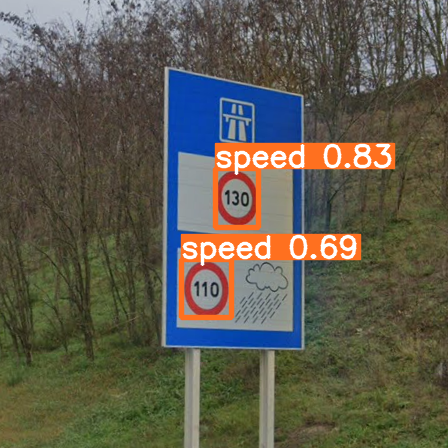

detect: weights=['/content/drive/MyDrive/best.pt'], source=/content/test_data/80.png, data=yolov5/data/coco128.yaml, imgsz=[448, 448], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_data/80.png: 448x448 1 speed, 205.6ms
Speed: 1.7ms pre-process, 205.6ms inference, 1.1ms NMS per image at shape (1, 3, 448, 448)
Results saved to yolov5/runs/detect/exp20
/content/yolov5/runs/detect/exp20/80.png


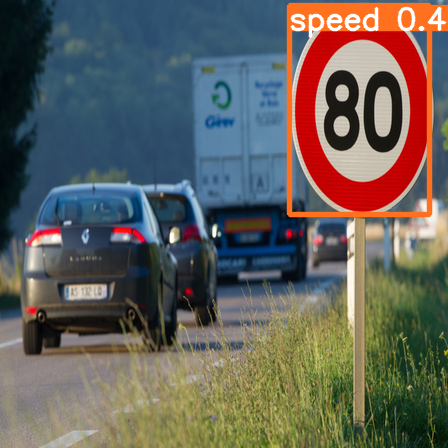

detect: weights=['/content/drive/MyDrive/best.pt'], source=/content/test_data/cedez2.png, data=yolov5/data/coco128.yaml, imgsz=[448, 448], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_data/cedez2.png: 448x448 1 ceder_le_passage, 188.7ms
Speed: 1.9ms pre-process, 188.7ms inference, 1.3ms NMS per image at shape (1, 3, 448, 448)
Results saved to yolov5/runs/detect/exp21
/content/yolov5/runs/detect/exp21/cedez2.png


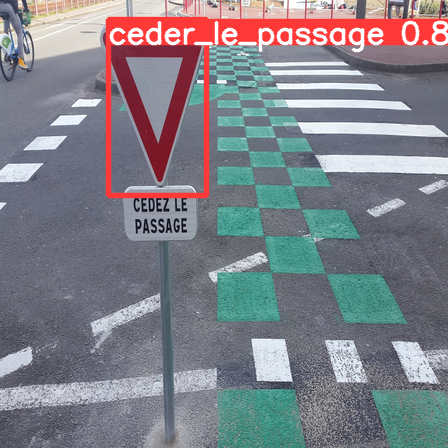

detect: weights=['/content/drive/MyDrive/best.pt'], source=/content/test_data/30.png, data=yolov5/data/coco128.yaml, imgsz=[448, 448], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test_data/30.png: 448x448 1 speed, 199.1ms
Speed: 2.3ms pre-process, 199.1ms inference, 1.6ms NMS per image at shape (1, 3, 448, 448)
Results saved to yolov5/runs/detect/exp22
/content/yolov5/runs/detect/exp22/30.png


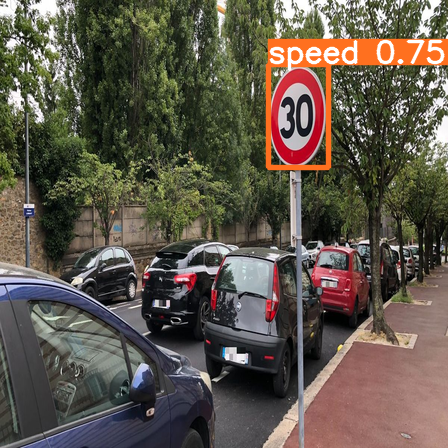

In [20]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# chemin du modele à utiliser
#MODEL_PATH = "/content/yolov5/runs/train/exp2/weights/best.pt"  # modèle de base de yolo => "yolov5s.pt"
MODEL_PATH = '/content/drive/MyDrive/best.pt'

# Chemin vers le dossier contenant les images de test
test_folder_path = '/content/test_data/'

# Liste pour stocker les images détectées
detected_images = []

# Charger le modèle YOLOv5 et effectuer la détection pour chaque image
for filename in os.listdir(test_folder_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Assurez-vous que seuls les fichiers d'image sont traités
        image_path = os.path.join(test_folder_path, filename)

        !python yolov5/detect.py --weights "{MODEL_PATH}" --img 448 --conf 0.25 --source "{image_path}"

        # Trouver le dossier contenant les images détectées
        detect_folder = '/content/yolov5/runs/detect/'
        detect_folders = [f for f in os.listdir(detect_folder) if os.path.isdir(os.path.join(detect_folder, f))]
        dossiers_valides = [dossier for dossier in detect_folders if dossier.startswith('exp') and dossier[3:].isdigit()]

        # Si aucun dossier valide n'est trouvé, le plus récent est "exp"
        if not dossiers_valides:
            dernier_dossier_plus_ancien = "exp"
        else:
            # Trier la liste en fonction des nombres extraits
            liste_dossiers_tries = sorted(dossiers_valides, key=lambda x: int(x[3:]))
            # Sélectionner le dernier élément de la liste triée
            dernier_dossier_plus_ancien = liste_dossiers_tries[-1]

        output_image_path = os.path.join(detect_folder, dernier_dossier_plus_ancien, filename)
        print(output_image_path)
        detected_images.append(output_image_path)

        # Plot img
        img = cv2.imread(output_image_path, cv2.IMREAD_UNCHANGED)
        cv2_imshow(img)


**Predictions avec le modèle de base ET notre réentrainement ???**

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-2-18 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


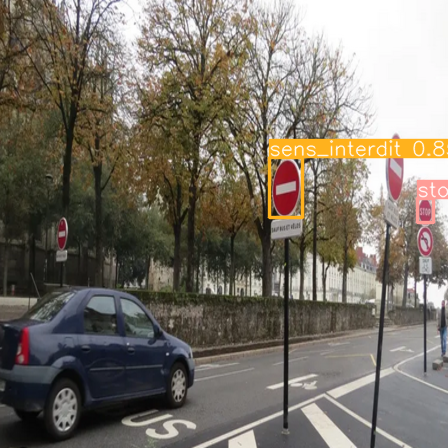

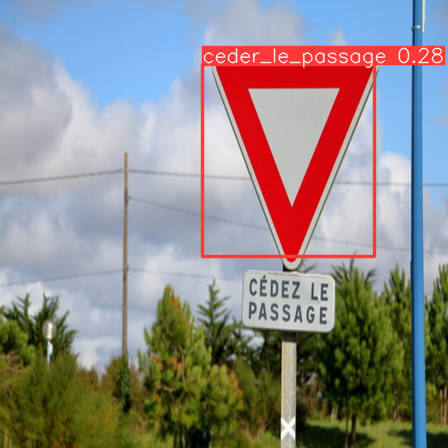

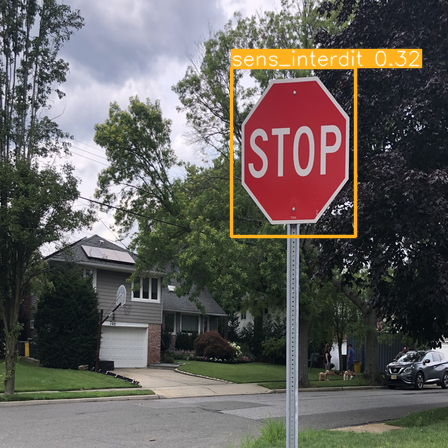

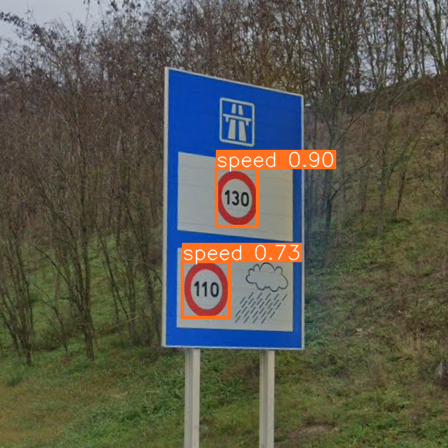

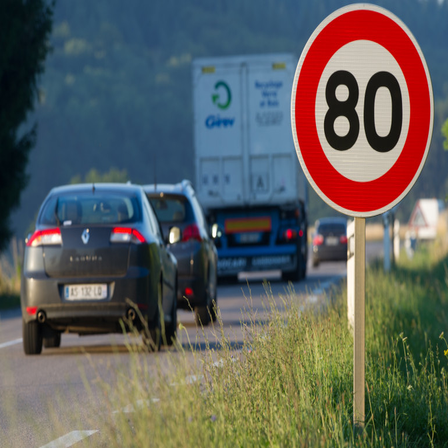

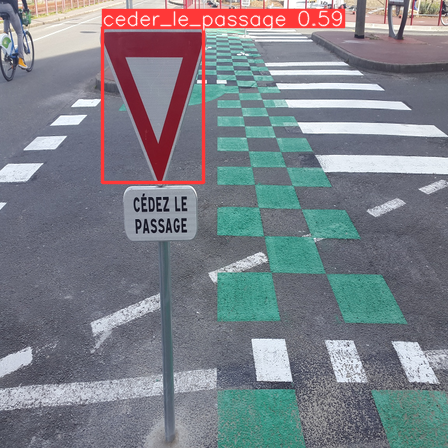

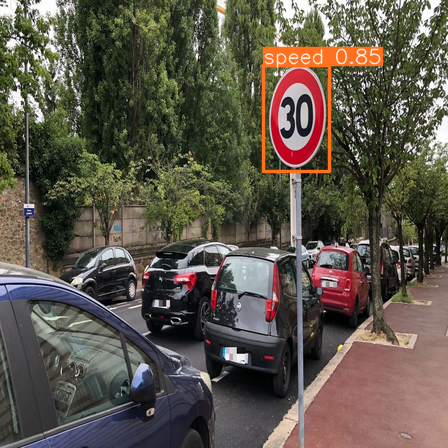

In [21]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

# load model
model = torch.hub.load('ultralytics/yolov5', 'custom',path = MODEL_PATH, force_reload=True, trust_repo=True)

# Liste des noms de fichiers d'images de test
image_files = [f for f in os.listdir(test_folder_path) if f.endswith('.jpg') or f.endswith('.png')]

# Parcourir chaque image de test
for image_file in image_files:
    # Chemin complet de l'image
    image_path = os.path.join(test_folder_path, image_file)
    results = model(image_path)  # inference
    results.show()  # or .show(), .save(), .crop(), .pandas(), .print() etc....

**VISUALISATION / ANALYSE**

In [ ]:
# !pip install comet_ml  # 1. install
# export COMET_API_KEY="662OnFtnTXsX39yaAfaIVJGnD"  # 2. paste API key

In [22]:
# from comet_ml import Experiment
# from comet_ml.integration.pytorch import log_model

# experiment = Experiment(
#   api_key="662OnFtnTXsX39yaAfaIVJGnD",
#   project_name="general",
#   workspace="naghan1132"
# )

# # Report multiple hyperparameters using a dictionary:
# hyper_params = {
#    "learning_rate": 0.5,
#    "steps": 100000,
#    "batch_size": 50,
# }
# experiment.log_parameters(hyper_params)

# # Initialize and train your model
# # model = TheModelClass()
# # train(model)

# # Seamlessly log your Pytorch model
# #log_model(experiment, "TheModel", model)